# import

In [1]:
from pyaw import utils_cal, configs, swarm
import importlib
importlib.reload(utils)
importlib.reload(configs)
importlib.reload(swarm)

<module 'pyaw.swarm' from 'D:\\cleo\\master\\pyaw\\pyaw\\swarm.py'>

# data fp and time range

In [2]:
fp_e = r"\\Diskstation1\file_three\aw\swarm\A\efi16\sw_efi16A_20160311T000000_20160311T235959_0.pkl"
fp_b = r"\\Diskstation1\file_three\aw\swarm\A\vfm50\sw_vfm50A_20160311T060000_20160311T070000_0.pkl"
start = '20160311T064700'
end = '20160311T064900'

# read data
set outliers nan, interpolate nan with linear, bfill, ffill methods in order.
use moving average to get the background field and disturb field.

In [3]:
df_e = swarm.pre_e(fp_e,start,end,handle_outliers=True)
df_b = swarm.pre_b(fp_b,start,end,handle_outliers=True)

df['eh_sc1'] set nan:
20
datetime
2016-03-11 06:47:02.381750107    -25.189461
2016-03-11 06:47:02.881750107    -52.246895
2016-03-11 06:47:05.193749905    -77.747688
2016-03-11 06:47:08.381750107     32.064510
2016-03-11 06:47:12.318749905    122.049973
2016-03-11 06:47:13.193749905    -50.420204
2016-03-11 06:47:20.443749905    -52.979156
2016-03-11 06:47:23.318749905    -57.540714
2016-03-11 06:47:25.443749905     90.709106
2016-03-11 06:47:31.818749905     35.128010
2016-03-11 06:47:32.193749905     71.152878
2016-03-11 06:47:32.506750107     56.372738
2016-03-11 06:47:47.443749905     31.657372
2016-03-11 06:47:48.443749905     27.904247
2016-03-11 06:47:48.568749905     58.081692
2016-03-11 06:47:48.631750107   -630.023132
2016-03-11 06:47:48.693749905   -665.179688
2016-03-11 06:47:48.756750107   -455.312073
2016-03-11 06:47:49.568749905    209.649460
2016-03-11 06:47:53.193749905    125.686043
Name: eh_sc1, dtype: float32

df['eh_sc2'] set nan:
21
datetime
2016-03-11 06:47:04.13

# visualization

In [4]:
plotsignal = utils.PlotSignal()

## eh_enu1

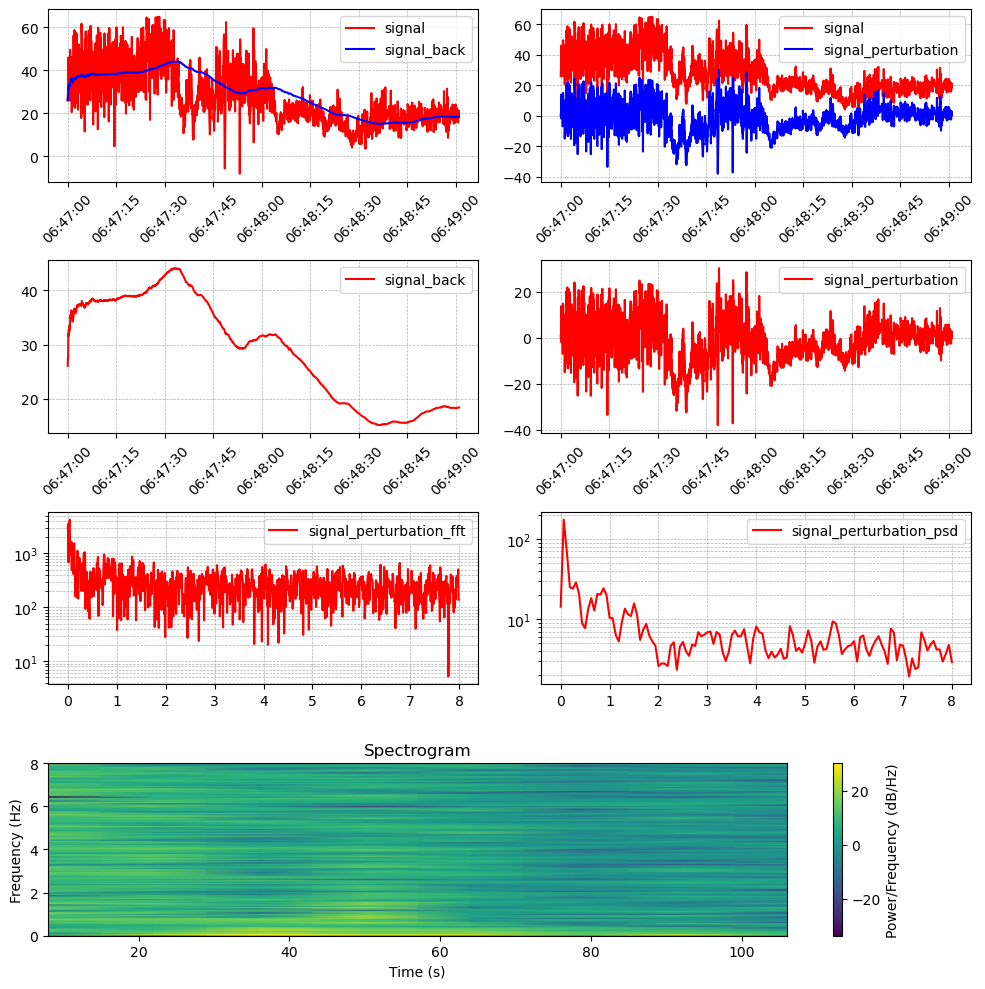

In [7]:
plotsignal.one_signal_detaild(df_e['eh_enu1'],df_e['eh0_enu1'],df_e['eh1_enu1'],fs=configs.fs_efi16)

## eh_enu1

## b_enu1

## b_enu2

## resample
down resample

In [ ]:
df_e['timestamp'] = df_e.index.astype('int64')
df_b['timestamp'] = df_b.index.astype('int64')

In [ ]:
from scipy.interpolate import interp1d
interp_func1 = interp1d(df_b['timestamp'], df_b['b1_enu1'], kind='linear', fill_value="extrapolate")
interp_func2 = interp1d(df_b['timestamp'], df_b['b1_enu2'], kind='linear', fill_value="extrapolate")
df_e['b1_enu1_interp'] = interp_func1(df_e['timestamp'])
df_e['b1_enu2_interp'] = interp_func2(df_e['timestamp'])

## eh1_enu1 and b1_enu2

In [ ]:
from matplotlib import pyplot as plt


def mul_plot(df_e):
    plt.figure()
    plt.plot(df_e_clip.index,df_e_clip['eh1_enu2'], color='r',label='eh1_enu2')
    plt.plot(df_e_clip.index,df_e_clip['b1_enu1_interp'],color='b',label='b1_enu1_interp')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

## eh1_enu2 and b1_enu1

In [11]:
signal1 = df_b['eh1_enu1_interp']
signal2 = df_b['b1_enu2']

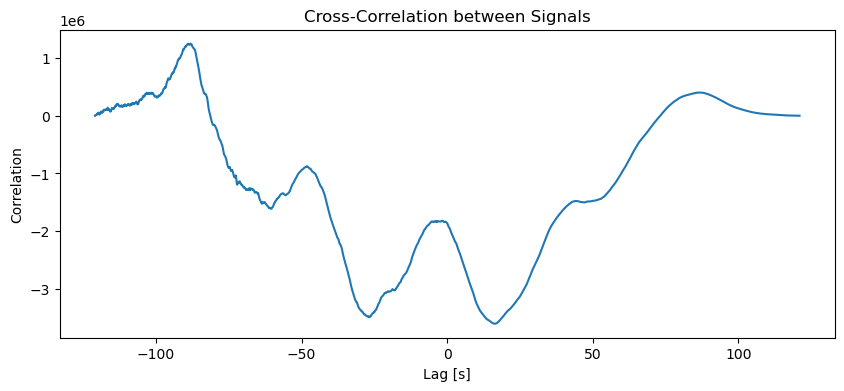

In [12]:
plotsignal.double_signals_cross_correlation(signal1,signal2)

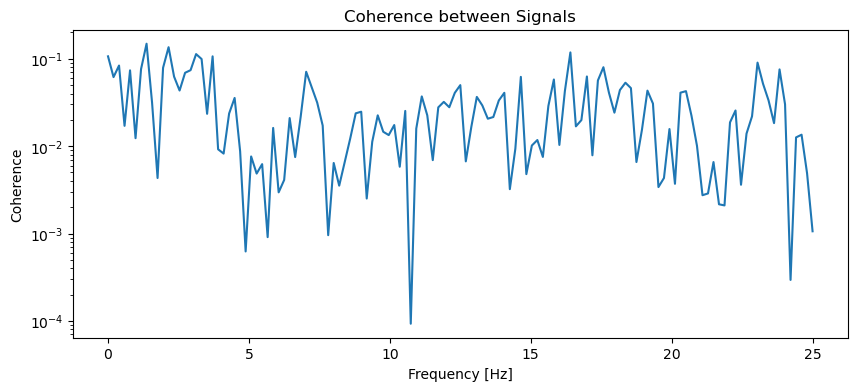

In [13]:
plotsignal.double_signals_coherence(signal1,signal2)

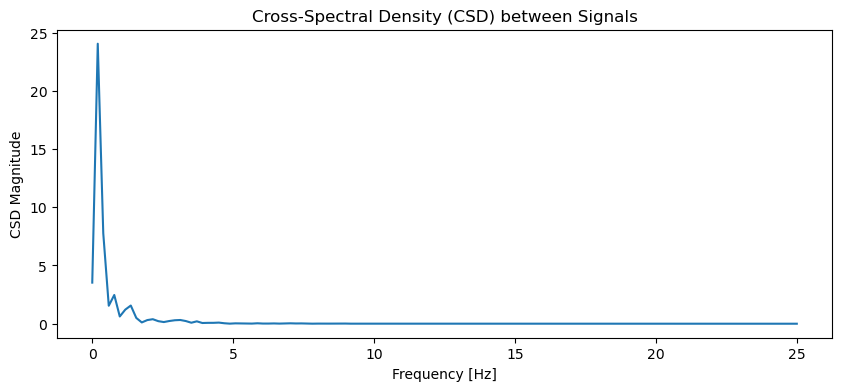

In [14]:
plotsignal.double_signals_csd(signal1,signal2)

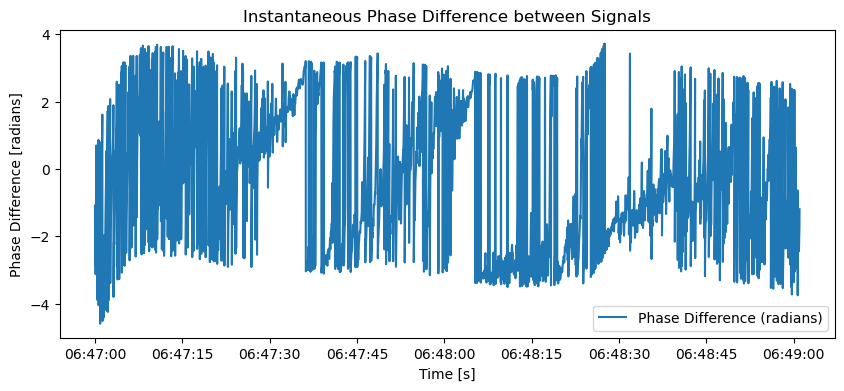

In [15]:
plotsignal.double_signals_hilbert_phase_diff(signal1,signal2)

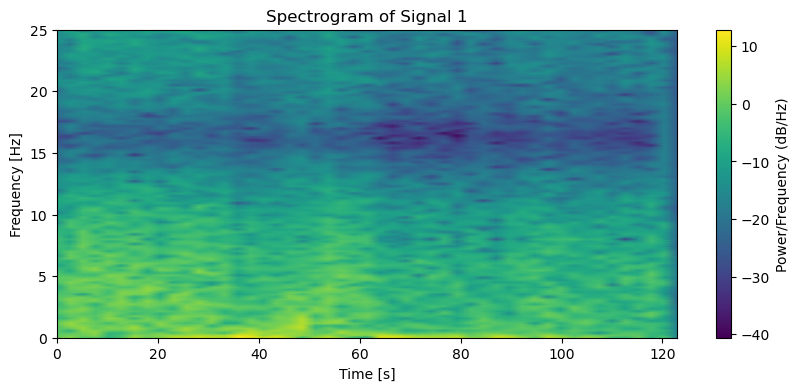

In [16]:
plotsignal.one_signal_stft(signal1,50)

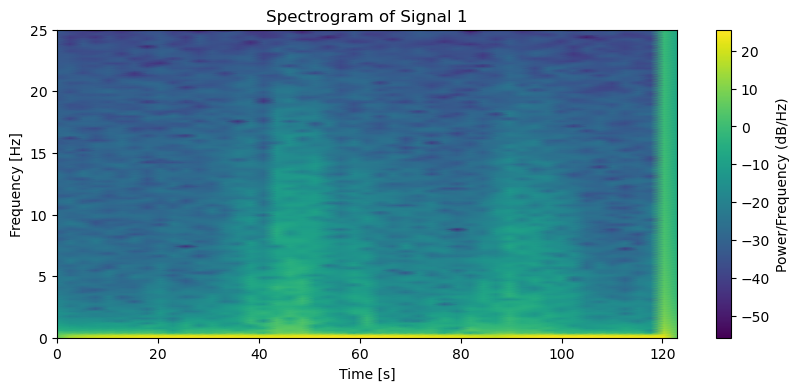

In [17]:
plotsignal.one_signal_stft(signal2,50)

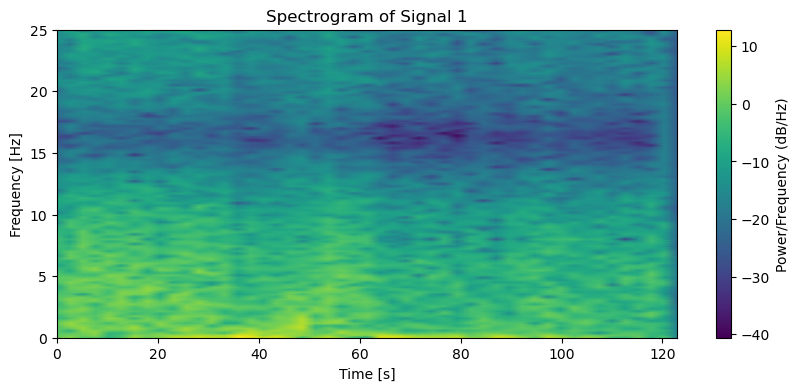

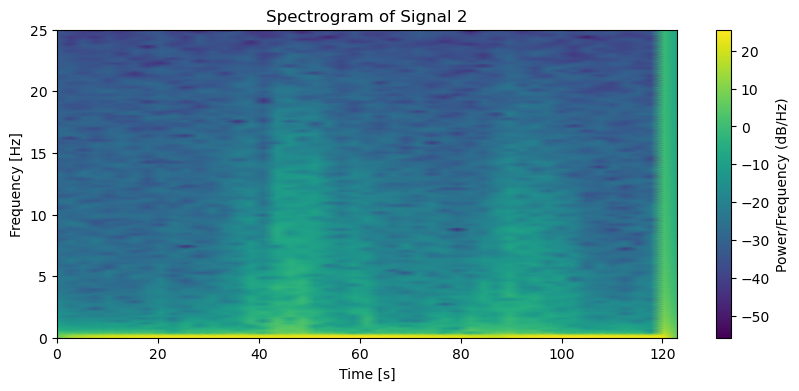

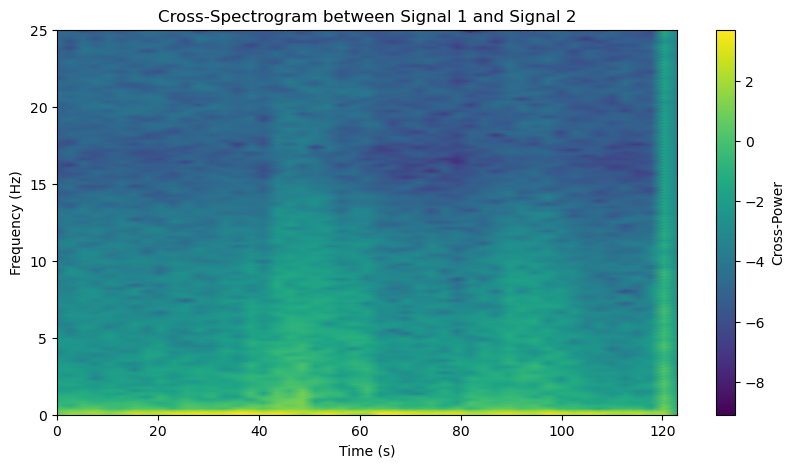

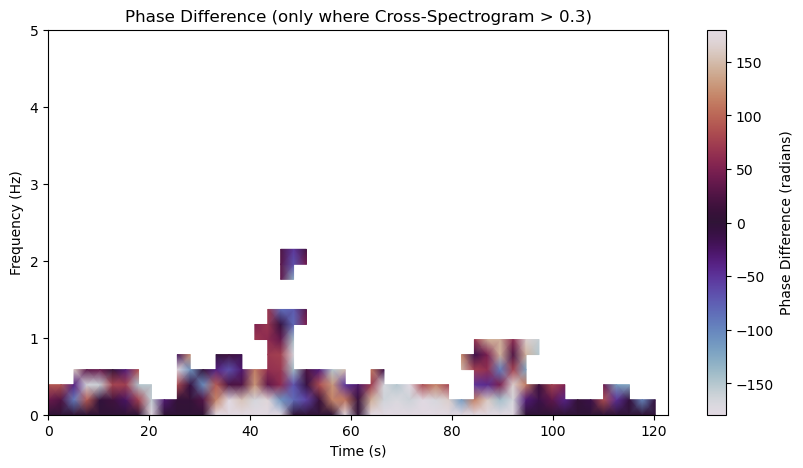

In [18]:
plotsignal.double_signals_time_cspd(signal1,signal2)